# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Clone in the git hub repo

In [12]:
#! git clone https://github.com/DS3001/labs
#don't know why it isn't showing up

fatal: destination path 'labs' already exists and is not an empty directory.


In [13]:
ls labs

01_api_calls/       02_scraping/        03_computer_vision/ README.md


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read in the csv as a df

In [70]:
cars = pd.read_csv("/Users/johnjordan/Desktop/DS 3001/cars_hw.csv")

**1.) Clean the data and perform some EDA and visualization to get to know the data set.**

a.) Find the column names

In [71]:
cars.columns

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

b.) Get summary stats of all of the columns

In [72]:
def sum_stats (df):
    print(df.head())
    print(df.describe())
    print(df.shape)
    print(df.isnull().sum())

In [73]:
sum_stats (cars)

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
       Unnamed: 0    Make_Year  

c.) Rename the Unamed column to ID and drop the old column

In [74]:
cars['ID'] = cars['Unnamed: 0']
cars.drop(columns=['Unnamed: 0'], inplace=True)

d.) Create a histogram of the price and mileage run

(array([ 44., 184., 169., 173., 155.,  88.,  68.,  20.,  16.,   9.,  10.,
         15.,  11.,  13.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 188000.,  325650.,  463300.,  600950.,  738600.,  876250.,
        1013900., 1151550., 1289200., 1426850., 1564500., 1702150.,
        1839800., 1977450., 2115100., 2252750., 2390400., 2528050.,
        2665700., 2803350., 2941000.]),
 <BarContainer object of 20 artists>)

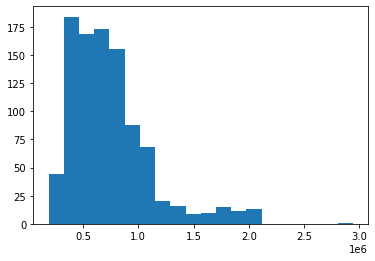

In [75]:
plt.hist(cars.Price, bins=20)

(array([22., 59., 66., 74., 85., 84., 67., 69., 65., 63., 52., 41., 41.,
        35., 41., 22., 23., 25., 22., 20.]),
 array([ 1117. ,  6035.9, 10954.8, 15873.7, 20792.6, 25711.5, 30630.4,
        35549.3, 40468.2, 45387.1, 50306. , 55224.9, 60143.8, 65062.7,
        69981.6, 74900.5, 79819.4, 84738.3, 89657.2, 94576.1, 99495. ]),
 <BarContainer object of 20 artists>)

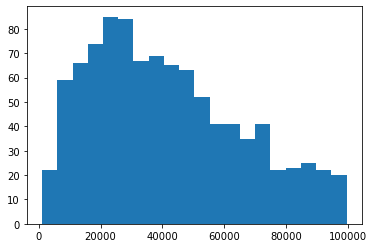

In [76]:
plt.hist(cars.Mileage_Run, bins=20)

e.) Create boxplots of the categorical variables

In [77]:
def boxplots (df, column):
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {column}')
    plt.show()

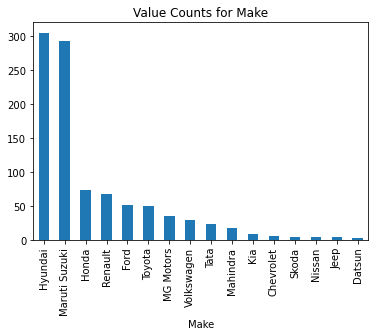

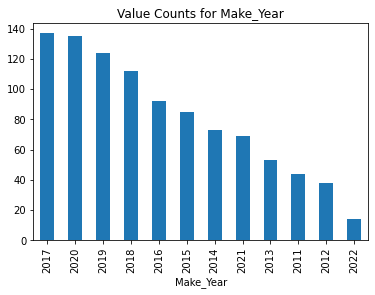

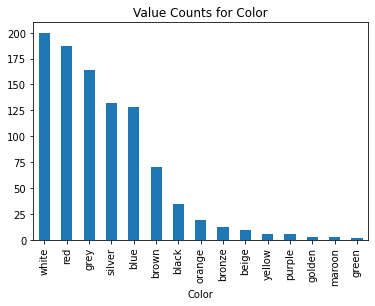

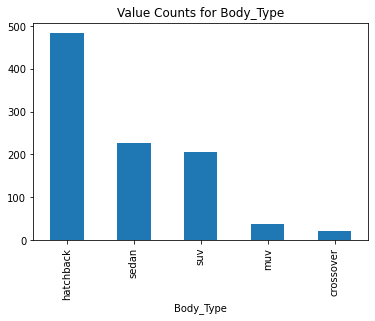

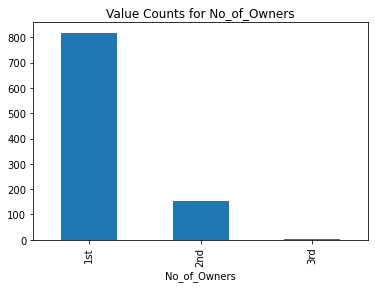

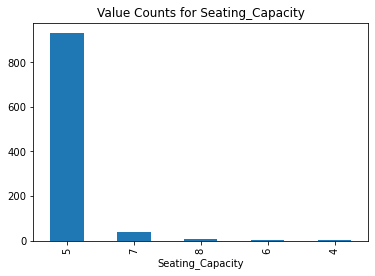

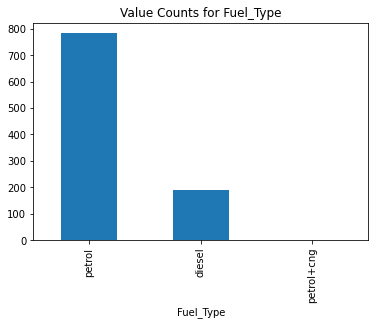

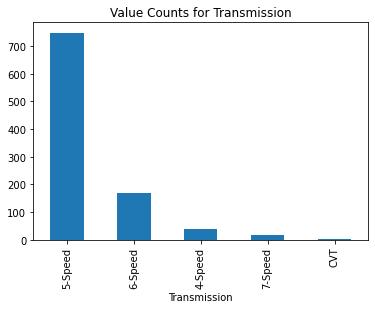

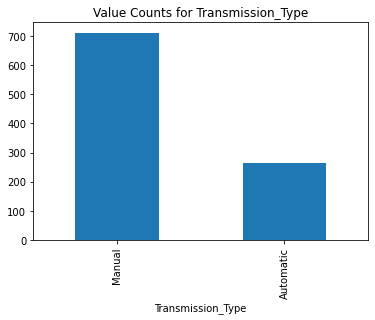

In [78]:
# List of columns to plot
columns = ['Make', 'Make_Year', 'Color', 'Body_Type',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type']

# Loop through each column and call the function
for col in columns:
    boxplots(cars, col)

2.) Transform categorical variables

In [79]:
cat_cols = ['Make', 'Color', 'Body_Type',
       'No_of_Owners', 'Fuel_Type', 'Transmission',
       'Transmission_Type']
for col in cat_cols:
    dummies = pd.get_dummies(cars[col], dtype='int', drop_first=False)
    
    cars = pd.concat([cars, dummies], axis=1)
    
    cars.drop(columns=[col], inplace=True)

3.) Implement an 80/20 train-test split. Put the test data aside

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
cars.columns

Index(['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price', 'ID',
       'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia',
       'MG Motors', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'beige', 'black', 'blue', 'bronze',
       'brown', 'golden', 'green', 'grey', 'maroon', 'orange', 'purple', 'red',
       'silver', 'white', 'yellow', 'crossover', 'hatchback', 'muv', 'sedan',
       'suv', '1st', '2nd', '3rd', 'diesel', 'petrol', 'petrol+cng', '4-Speed',
       '5-Speed', '6-Speed', '7-Speed', 'CVT', 'Automatic', 'Manual'],
      dtype='object')

In [102]:
y = cars['Price']
x = cars.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price', 'ID',
       'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia',
       'MG Motors', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'beige', 'black', 'blue', 'bronze',
       'brown', 'golden', 'green', 'grey', 'maroon', 'orange', 'purple', 'red',
       'silver', 'white', 'yellow', 'crossover', 'hatchback', 'muv', 'sedan',
       'suv', '1st', '2nd', '3rd', 'diesel', 'petrol', 'petrol+cng', '4-Speed',
       '5-Speed', '6-Speed', '7-Speed', 'CVT', 'Automatic', 'Manual']]

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

4.) Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and  𝑅2
  on the both the training and test sets. Which of your models does the best?

In [113]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
cars_2 = pd.read_csv("/Users/johnjordan/Desktop/DS 3001/cars_hw.csv")

In [123]:
x = cars_2[['Mileage_Run', 'Make_Year']]
y = cars_2['Price']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [125]:
reg = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [126]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [3.02392384e+00 8.25533493e+04]
Intercept: -165895072.23235494
Mean Squared Error: 92432542568.10547
R-squared: 0.32682925706619126


In [127]:
x = cars_2[['Make_Year', 'Seating_Capacity']]
y = cars_2['Price']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [129]:
reg = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [130]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [67554.43182645 72550.31222008]
Intercept: -135887693.1852704
Mean Squared Error: 97605644262.28581
R-squared: 0.2891544229223867


In [131]:
x = cars_2[['Mileage_Run', 'Seating_Capacity']]
y = cars_2['Price']

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [133]:
reg = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [134]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [-2.75250167e+00  7.24151898e+04]
Intercept: 483157.77575836796
Mean Squared Error: 134686529655.89597
R-squared: 0.019100538483712848


The model with the Mileage and the Make year did better than the one with the make year and seating capacity and the one with the mileage and seating capacity.

5.) Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and  𝑅2
  on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [144]:
y = cars['Price']
x = cars.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price', 'ID',
       'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia',
       'MG Motors', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'crossover', 'hatchback', 'muv', 'sedan',
       'suv', '1st', '2nd', '3rd', '4-Speed',
       '5-Speed', '6-Speed', '7-Speed', 'CVT', 'Automatic', 'Manual']]

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [146]:
reg = linear_model.LinearRegression(fit_intercept=True).fit(x_train,y_train)

In [147]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [ 1.14931599e-10  4.63346506e-16  6.38485623e-11  1.00000000e+00
 -2.11171700e-15 -4.10262526e-11  1.47581576e-12  1.56618119e-11
  2.65493471e-11  2.15964387e-11 -5.15312595e-12  5.71308054e-11
 -2.10596921e-10  2.02361348e-11  1.57966672e-11 -4.20796738e-12
  2.51101669e-12  3.74724249e-11  1.23899885e-11  3.09443464e-11
  1.92194789e-11 -1.27889257e-11 -1.05363140e-11 -1.68981870e-13
 -1.51166645e-12  2.50058847e-11  2.27534956e-12 -1.01274335e-12
 -1.26259672e-12 -4.43992297e-12  2.19875563e-11 -1.04117937e-11
  6.10237735e-12 -1.32382200e-11  1.14129818e-11 -1.14129811e-11]
Intercept: -2.3096799850463867e-07
Mean Squared Error: 2.548748067868208e-19
R-squared: 1.0


The more complex model did significantly better than the simpler ones. However, I believe that this model may suffer from a decent amount of overfitting.

6.) Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?

Honestly, the biggest thing that I learned from all of this was how one-hot encoding/dummy variables worked. Prior to this I had no real experience with any of it, especially in terms of building the actual model. While I do not feel I have done everything correctly, especially in terms of how to actually build the model after transforming the variables, I do feel that I have learned a decent amount about how over and underfitting works through the demonstrations of simple and complex models.

7.) If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and  𝑅2
 ? We'll cover the Lasso later in detail in class

In [158]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [150]:
y = cars['Price']
x = cars.loc[:,['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price', 'ID',
       'Chevrolet', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jeep', 'Kia',
       'MG Motors', 'Mahindra', 'Maruti Suzuki', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'beige', 'black', 'blue', 'bronze',
       'brown', 'golden', 'green', 'grey', 'maroon', 'orange', 'purple', 'red',
       'silver', 'white', 'yellow', 'crossover', 'hatchback', 'muv', 'sedan',
       'suv', '1st', '2nd', '3rd', 'diesel', 'petrol', 'petrol+cng', '4-Speed',
       '5-Speed', '6-Speed', '7-Speed', 'CVT', 'Automatic', 'Manual']]

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=100)

In [168]:
lasso = Lasso(alpha=0.1) 

# Fit the model to the training data
lasso.fit(x_train, y_train) 

Lasso(alpha=0.1)

In [170]:
# Get feature coefficients
coef = pd.Series(lasso.coef_, index=x.columns)

# Print most predictive features
print("Most predictive features:")
print(coef[coef != 0].sort_values(key=np.abs, ascending=False))

Most predictive features:
Price          1.000000e+00
Mileage_Run    4.305973e-09
dtype: float64


The Lasso model choses just the Mileage_Run as the only feature in the best model

In [171]:
y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [ 0.00000000e+00  4.30597342e-09 -0.00000000e+00  1.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
Intercept: -0.00021454051602631807
Mean Squared Error: 1.0597956455522074e-08
R-squared: 1.0
